### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [457]:
data = pd.read_csv('data/coupons.csv')

In [458]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [459]:
# Look for rows with nulls
data.info()

# Nulls appear in car (12684 -108), Bar (107), CoffeeHouse (217), CarryAway (151), RestaurantLessThan20 (130), and Restaurant20To50 (189).

# Look for rows with N/A
data.isna().count()

# No rows contain N/A

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                     12684
Bar                     12684
CoffeeHouse             12684
CarryAway               12684
RestaurantLessThan20    12684
Restaurant20To50        12684
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [460]:
# Because there are not many values in the car column, this might not be a useful column.  Let's take a look at what data it contains.
print( "Unique car values:", data['car'].unique() )
print()

# This data seems to be car type.  However, it doesn't look like it was collected consistently.  Let's drop this column.
cdata = data.drop('car', axis=1)

# Grab the columns with nulls
null_col = cdata.isnull().any(axis=0)
null_col = null_col[null_col].index.tolist()
print(null_col)

# Print the unique values for those columns missing data.
for col in null_col:
    print(col)
    print(cdata[col].unique())

# It looks like all of these colums have 'never' as a value.  
# It is probably safe to assume that respondents did not answer questions when it did not apply to them.
# Thus, we will replace the NAs with 'never'.
cdata = cdata.fillna('never')


Unique car values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Bar
['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse
['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20
['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


4. What proportion of the total observations chose to accept the coupon?



In [461]:
cdata['Y'].value_counts()[1] / cdata['Y'].value_counts().sum()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


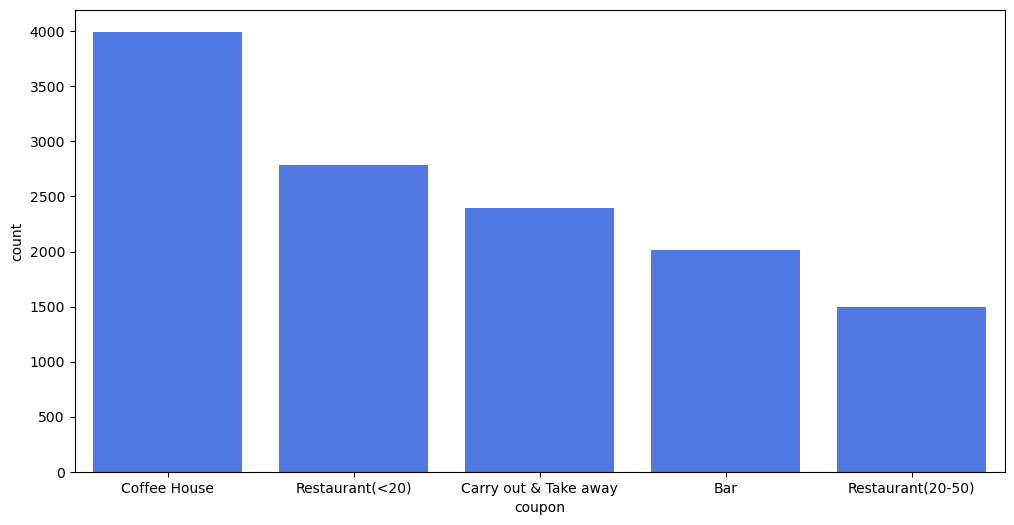

In [462]:
# Plot the count of each unique value in the coupon column.
plt.figure(figsize=(12,6))
sns.barplot(cdata['coupon'].value_counts() )
print(cdata['coupon'].value_counts())

6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


<Axes: xlabel='temperature', ylabel='Count'>

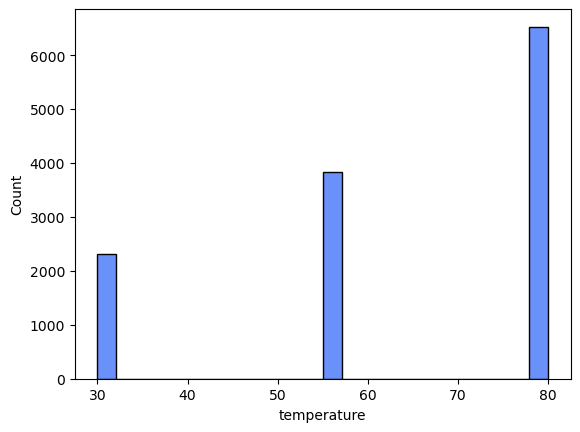

In [463]:
print(cdata['temperature'].value_counts())
sns.histplot(cdata, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [464]:
bardata = cdata.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [465]:
def accept_ratio(df):
    num_rows = len(df)
    if num_rows == 0:
        return 0
    else:
        ratio = df['Y'].value_counts()[1] / df['Y'].value_counts().sum()
        return ratio

tot_bar_coup_ratio = accept_ratio( bardata )
print(tot_bar_coup_ratio)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [466]:
# Set the values to filter on.
under3_values = ['never', 'less1', '1~3']
over3_values = ['gt8', '4~8']

# Filter bar-coupon data for those both within and without the group.
bar_under3_data = bardata[bardata['Bar'].isin(under3_values)]
bar_over3_data = bardata[bardata['Bar'].isin(over3_values)]

# Print the comparison
print("Acceptance rate for those who go to the bar:")
print("   <= 3x / month:", accept_ratio( bar_under3_data ))
print("   >  3x / month:", accept_ratio( bar_over3_data ))

Acceptance rate for those who go to the bar:
   <= 3x / month: 0.37073707370737075
   >  3x / month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [467]:
# print(cdata['Bar'].unique())
# print(cdata['age'].unique())

# Set the values to search on.
over1_bar_values = ['1~3', 'gt8', '4~8']
over25_age_values = ['26', '31', '36', '41', '46', '50plus']

# Filter bar-coupon data for those both within and without the group.
over_25_and_1bartrip_data = bardata.query('Bar in @over1_bar_values and age in @over25_age_values')
not_over_25_and_1bartrip_data = bardata.query('not (Bar in @over1_bar_values and age in @over25_age_values)')

# Compute the ratios
in_criteria_ratio = accept_ratio( over_25_and_1bartrip_data )
out_criteria_ratio = accept_ratio( not_over_25_and_1bartrip_data )

# Print the comparison
print("Bar coupon acceptance rate of those in the 1x/mo bar trip and are over the age of 25:")
print(f"{in_criteria_ratio:.1%}", " for those in the group")
print(f"{out_criteria_ratio:.1%}", " for those not in the group.")


Bar coupon acceptance rate of those in the 1x/mo bar trip and are over the age of 25:
69.5%  for those in the group
33.5%  for those not in the group.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [468]:
# print(cdata['passanger'].unique())

# Set the values to search on.
not_kid_values = ['Friend(s)', 'Partner']  # Note: Exclude 'Alone' as they do not have passengers
occupation_values = cdata['occupation'].unique()
not_3F_occupation_values = np.delete(occupation_values, np.where(occupation_values == 'Farming Fishing & Forestry'))

# Filter bar-coupon data for those both within and without the group.
target_driver_data = bardata.query('Bar in @over1_bar_values and passanger in @not_kid_values and occupation in @not_3F_occupation_values')
nontarget_driver_data = bardata.query('not (Bar in @over1_bar_values and passanger in @not_kid_values and occupation in @not_3F_occupation_values)')

# Compute the ratios
in_criteria_ratio = accept_ratio( target_driver_data )
out_criteria_ratio = accept_ratio( nontarget_driver_data )

# Print the comparison
print("Bar coupon acceptance rate of those in the 1x/mo bar trip, non-kid passengers, and do not work in Farming, Fishing, or Forestry:")
print(f"{in_criteria_ratio:.1%}", " for those in the group")
print(f"{out_criteria_ratio:.1%}", " for those not in the group.")


Bar coupon acceptance rate of those in the 1x/mo bar trip, non-kid passengers, and do not work in Farming, Fishing, or Forestry:
71.8%  for those in the group
37.7%  for those not in the group.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [469]:
# These are the print statements that were used to get all unique values for the listed columns.
# They are no longer needed
#
# print(cdata['age'].unique())
# print(cdata['RestaurantLessThan20'].unique())
# print(cdata['income'].unique())

# Set the values to search on.  Note: over1_bar_values, not_kid_values already defined
#
not_widowed_values = cdata['maritalStatus'].unique()
not_widowed_values = np.delete(not_widowed_values, np.where(not_widowed_values == 'Widowed'))
under30_age_values = ['below21', '21', '26']
cheapeats_4plus_values = ['4~8', 'gt8'] # Do not include 'never', 'less1', '1~3' 
income_under_50k_values = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
# Did not include: '$50000 - $62499' '$62500 - $74999' '$75000 - $87499' '$87500 - $99999' '$100000 or More' 

# Filter bar-coupon data for those both within and without the group.
target_drinkers_with_passengers_data = bardata.query('Bar in @over1_bar_values and passanger in @not_kid_values and maritalStatus in @not_widowed_values')
target_youth_drinkers_data = bardata.query('Bar in @over1_bar_values and age in @under30_age_values')
target_cheap_eaters_data = bardata.query('RestaurantLessThan20 in @cheapeats_4plus_values and income in @income_under_50k_values')


# Compute the ratios
drinkers_with_passengers_ratio = accept_ratio( target_drinkers_with_passengers_data )
youth_drinkers_ratio = accept_ratio( target_youth_drinkers_data )
cheap_eaters_ratio = accept_ratio( target_cheap_eaters_data )

# Print the comparison
print("Bar coupon acceptance rate of those in the following groups:")
print(f"{drinkers_with_passengers_ratio:.1%}", " for those in the \"go to bars more than once a month, had passengers that were not a kid, and were not widowed\" group.")
print(f"{youth_drinkers_ratio:.1%}", " for those in the \"go to bars more than once a month and are under the age of 30\" group.")
print(f"{cheap_eaters_ratio:.1%}", " for those in the \"go to cheap restaurants more than 4 times a month and income is less than 50K\" group.")


Bar coupon acceptance rate of those in the following groups:
71.8%  for those in the "go to bars more than once a month, had passengers that were not a kid, and were not widowed" group.
72.2%  for those in the "go to bars more than once a month and are under the age of 30" group.
45.3%  for those in the "go to cheap restaurants more than 4 times a month and income is less than 50K" group.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

When the > 1x/mo bar attendance criteria was included, the coupon acceptance rates were all near 71%.
Thus, drivers that go to bars more than once a month appear to be more likely to accept bar coupons than those who do not go to bars so regularly.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Let's take a look at what drives acceptance of coupons for restaurants in the $20 - $50 / person price range.

We will first filter the data on these coupons and then look at what this acceptance is tied.

In [470]:
# Create a series of all column labels that we want to analyze for their impact upon coupon acceptance.
df_columns = [
'destination',
'passanger',
'weather',
'temperature',
'time',
'expiration',
'gender',
'age',
'maritalStatus',
'has_children',
'education',
'occupation',
'income',
'Bar',
'CoffeeHouse',
'CarryAway',
'RestaurantLessThan20',
'Restaurant20To50',
'toCoupon_GEQ5min',
'toCoupon_GEQ15min',
'toCoupon_GEQ25min',
'direction_same',
'direction_opp'] # Note:  coupon and Y columns have been removed.


In [471]:
# Filter the data for mid-priced restaurant ($20-50) coupons.
midrestdata = cdata.query("coupon == 'Restaurant(20-50)'")
num_restraunt_coupon_offers = midrestdata.count().iloc[0]

# Find and print the overall acceptance rate
midrest_overall_ratio = accept_ratio( midrestdata )
print(f"The overall mid-priced coupon acceptance rate is {midrest_overall_ratio:.1%} for {num_restraunt_coupon_offers} people.")

The overall mid-priced coupon acceptance rate is 44.1% for 1492 people.


In [472]:
# Create a function to print out the coupon acceptance ratios for each value of a specified column.
def print_ratios_for_col_values( df, colname ):

    # Iterate over each value of the specified column. 
    colvalues = df[colname].unique()
    colvalues.sort()
    for colvalue in colvalues:

        col_type = df[colname].dtype
        # If this the value is a string,
        if col_type == 'object':
            # Filter data for those both within and without the group.
            matched_data = df.query(f"{colname} == '{colvalue}'")
            unmatched_data = df.query(f"{colname} != '{colvalue}'")
        elif col_type == 'bool':
            boolval = bool(colvalue)
            # Filter data for those both within and without the group.
            matched_data = df.query(f"{colname} == {boolval}")
            unmatched_data = df.query(f"{colname} != {boolval}")
        else:
            # Filter data for those both within and without the group.
            matched_data = df.query(f"{colname} == {colvalue}")
            unmatched_data = df.query(f"{colname} != {colvalue}")

        # Compute the ratios
        in_criteria_ratio = accept_ratio( matched_data )
        out_criteria_ratio = accept_ratio( unmatched_data )

        # Make the text red if the specified criteria is negatively associated with coupon acceptance.
        if in_criteria_ratio < out_criteria_ratio:
            print(f"\x1b[31m", end="")
        # Make the text bold if the difference between the inside and outside of the criteria is > 10%
        if abs(in_criteria_ratio - out_criteria_ratio) > .1:
            print(f"\033[1m", end="")
        # Print the acceptance rate for those within the group specified by the in-criteria.  
        print(f"   {in_criteria_ratio:.1%} for {colname} == {colvalue}")  # Could include the following for displaying the out-criteria: "| {out_criteria_ratio:.1%} for {colname} (== | !=) {colvalue}"
        # Reset the color to black with no bolding.
        print(f"\x1b[0m\033[0m", end="")


In [473]:
# Compute and print the coupon acceptance ratios for each of the columns.
print(f"Coupon acceptance rate of those with:")
for col in df_columns:
    print_ratios_for_col_values( midrestdata, col )
    print()


Coupon acceptance rate of those with:
   43.0% for destination == Home
   50.2% for destination == No Urgent Place
   39.9% for destination == Work

   42.2% for passanger == Alone
   46.4% for passanger == Friend(s)
   37.4% for passanger == Kid(s)
   63.1% for passanger == Partner

   38.5% for weather == Rainy
   30.0% for weather == Snowy
   46.4% for weather == Sunny

   33.7% for temperature == 30
   42.4% for temperature == 55
   48.2% for temperature == 80

   61.6% for time == 10AM
   32.8% for time == 10PM
   53.8% for time == 2PM
   50.3% for time == 6PM
   39.9% for time == 7AM

   52.1% for expiration == 1d
   29.9% for expiration == 2h

   42.7% for gender == Female
   45.5% for gender == Male

   44.0% for age == 21
   49.7% for age == 26
   41.7% for age == 31
   47.0% for age == 36
   45.5% for age == 41
   48.8% for age == 46
   35.6% for age == 50plus
   41.3% for age == below21

   35.5% for maritalStatus == Divorced
   41.8% for maritalStatus == Married partner
   

### Selection of impactful criteria:
Those criteria that resulted in a greater than 10% change in the coupon acceptance were selected from the list above for futher analysis.

### The following are positively correlated to coupon acceptance:

The frequency of going to a mid-priced restaurant is correlated to the acceptance rate of this type of coupon.
    (68.8%, 62.6%, 52.7%, and 29.8% acceptance rate for those who go to mid-priced restaurants > 8 times/mo, 4-8 times, 1-3 times, and never.)
Therefore, distributing coupons to those who are at a resturant might be a good way to get these customers to come back more frequently.

The following occupations tend to accept coupons more than others:  
   Healthcare Support (65.6%), 
   Construction & Extraction (61.9%), 
   Office & Administrative Support (61.5%), 
   Production Occupations (61.5%)
Therefore, it may be worthwhile to distribute coupons at hospitals, medical clinics, contractor supply houses, and office buildings.

In general, those with some high school (58.3%) or high school graduates (51.9%) have a higher acceptance rate that those with more education.  
I am not certain how but there may be a way to target these people.

The time of day appears to make a difference with reguards to mid-priced restaurant coupon acceptance.
The best times are at 10AM (61.6%) and 2PM (53.8%).  However, there is a strong negative correlation with 10PM.
Therefore, it may be best to distribute coupons to the aforementioned business as people are about to head out to lunch or home for the day.

Being sunny does not appear to drive coupon acceptance.  However, not being sunny appears to negatively impact coupon acceptance (29.9%).
Therefore, one may only want to pay to distribute coupons on sunny days.

Interestingly enough, those that regularly go to bars and only occasionally (1-3 times) go to coffee shops seem to have a higher accepance rate than most at 59.5% and 55.1% respectively. 
This might make bars and coffee houses a good place to distribute or leave coupons.

Coupons that are good for a day are typically used much more than those which expire in a couple of hours.

Lastly, people that have their partner as passengers in their car are more likely to accept coupons than those with other passengers or no passengers (63.1% vs 42.1%).
This is another group that might be difficult to target but may be worthwhile to attempt to do so.

### FYI:  The following are heavily, negatively correlated to coupon acceptance and should be avoided if easy to do so.
Snowy weather, below 30 temperature, late in the evening, within 2 hours of coupon expiration, to those who are retired, to those who are widowed, to those in the Installation Maintenance & Repair business or in the Farming Fishing & Forestry business.



In [474]:
# Find the acceptance ratios for each value type in a column.
def unique_val_accept_ratios(df, col):

    # Enumerate the values in the specified column and create a dataframe from it.
    unique_col_vals = df[col].unique()
    rtn_df = pd.DataFrame(unique_col_vals, columns=['values'])
    rtn_df.set_index('values')
    rtn_df['percentage'] = np.nan
    rtn_df['threshold'] = 1

    # Compute the acceptance ratio for each unique value.
    for col_val in unique_col_vals:
        # Find all rows with the specified column value
        data_w_colval = df[df[col] == col_val]
        # Find the acceptance ratio for this subset 
        rtn_df.loc[rtn_df['values'] == col_val, 'percentage'] = accept_ratio(data_w_colval) *100

    # Add a threshold column where >50% = 2, (40 - 50%) = 1, and <40% = 0.
    rtn_df.loc[rtn_df['percentage'] > 50, 'threshold'] = 2 
    rtn_df.loc[rtn_df['percentage'] < 40, 'threshold'] = 0 
    
    return rtn_df

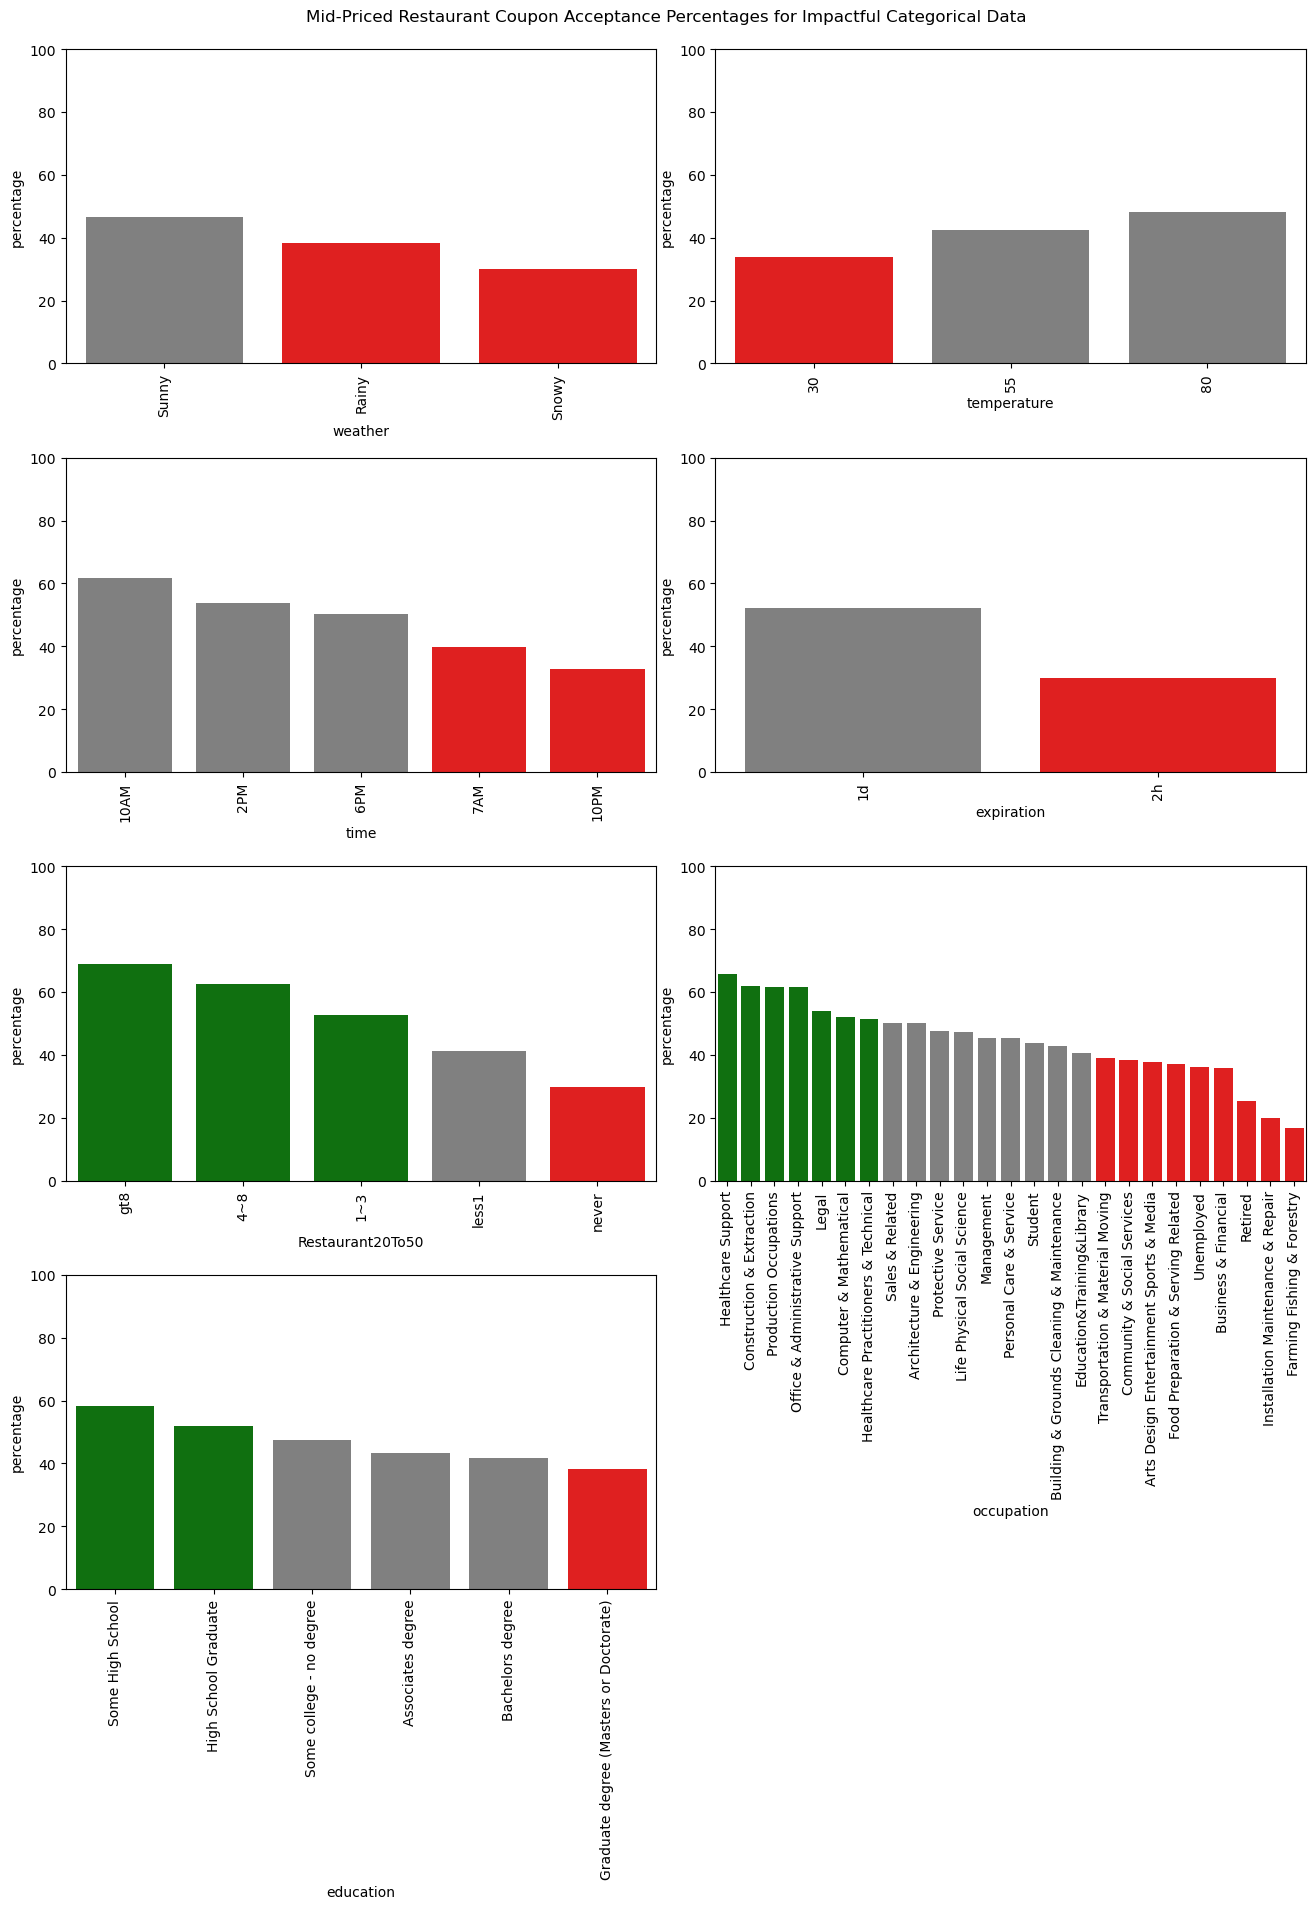

In [475]:
import warnings
import math
from matplotlib import colormaps

warnings.filterwarnings('ignore') # Ignore all warnings, specifically the warning about the # of colors in the palette

# Create a new (smr = significant mid-priced restaurant) dataframe with the impactful coulumns from above that resulted in more than a 10% increase.
all_sig_cols = ['weather', 'temperature', 'time', 'expiration', 'Restaurant20To50', 'occupation', 'education', 'Y']
smr_data = midrestdata[all_sig_cols]

# Create subplots
num_hplots = 2
num_vplots = math.ceil(len(all_sig_cols) / num_hplots)
fig, axes = plt.subplots(num_vplots, num_hplots, figsize=(16, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
# Create a custom color palette
custom_palette = sns.color_palette(['red', 'gray', 'green'])


h = 0
v = 0
for col in all_sig_cols:
    if col != 'Y':
        # Compute and sort the acceptance percentages for each value.
        ratio_data = unique_val_accept_ratios(smr_data, col) 
        ratio_data.sort_values(by=['percentage'], ascending=False, inplace=True)

        # Plot the acceptance percentages for each value.
        sns.barplot(ratio_data, x='values', y='percentage', palette=custom_palette, hue='threshold', ax=axes[v,h])
        axes[v,h].set(xlabel=col)
        axes[v,h].set_ylim(0, 100)
        axes[v,h].tick_params(axis='x', rotation=90)
        axes[v,h].legend_.remove()

        # Increment the plot location
        h += 1
        if h >= num_hplots:
            h = 0
            v += 1

axes[3, 1].axis('off')
fig.suptitle('Mid-Priced Restaurant Coupon Acceptance Percentages for Impactful Categorical Data', y=.9)
print()

In [476]:
# Finding the intersection of the aforementioned criteria, we can estimate how high we can drive acceptance.
Restaurant20To50_vals = ['1~3', '4~8', 'gt8']
occupation_vals = [
    'Construction & Extraction', 
    'Healthcare Support', 
    'Office & Administrative Support',
    'Production Occupations']
time_vals = ['10AM', '2PM', '6PM']
weather_vals = ['Sunny']
temperature_not_vals = [30]
expiration_vals = ['1d']

# Find our first subset of data to drive coupon acceptance.
intersectiondata = midrestdata.query(
    "Restaurant20To50 in @Restaurant20To50_vals and " \
    "occupation in @occupation_vals and " \
    "time in @time_vals and " \
    "weather in @weather_vals and " \
    "expiration in @expiration_vals")
num_people = intersectiondata.count().iloc[0]

# Find and print the coupon acceptance ratio.
in_criteria_ratio = accept_ratio( intersectiondata )
print(f"{in_criteria_ratio:.1%} of this subset of {num_people} people that meet all criteria should accept the mid-priced restaurant the coupon.")
print(f"20 people represent {0:.0%} of the sample set.", )

85.0% of this subset of 20 people that meet all criteria should accept the mid-priced restaurant the coupon.
20 people represent 0% of the sample set.


By combining all of these criteria, we can get a high 85% acceptance rate.  
However, this is only 20 of the 1492 total offers (1.3%).

In [477]:
# Finding the union of aforementioned criteria, we can determing how many people we can attract using all suggested techniques.
uniondata = midrestdata.query("Restaurant20To50 in @Restaurant20To50_vals or occupation in @occupation_vals or time in @time_vals or weather in @weather_vals or expiration in @expiration_vals")
num_people = uniondata.count().iloc[0]

# Find and print the coupon acceptance ratio.
in_criteria_ratio = accept_ratio( uniondata )
print(f"{in_criteria_ratio:.1%} of this subset of {num_people} people meet at least one of the criteria and should accept the mid-priced restaurant the coupon.")

45.8% of this subset of 1411 people meet at least one of the criteria and should accept the mid-priced restaurant the coupon.


By using any of these criteria, e.g. if we employed all targeting techniques, we would reach 1411 people of the 1492 coupon offers.
However, the 45.8% acceptance rate is only 1.7% greater than the 44.1% of the total sample population. 
It could be that these coupons in the sample set already did a good job of reaching the subset of the population represented by the aforementioned criteria.  

However, the coupon distribution histogram indicates that the restaurant coupons were the least offered of all coupons. 
This could indicate that this relatively small sample is not a good representation of the population as a whole.

Maybe what is most important isn't how many people we can reach with the coupons or the acceptance rate.  Maybe what is important is where to direct these coupon offers.


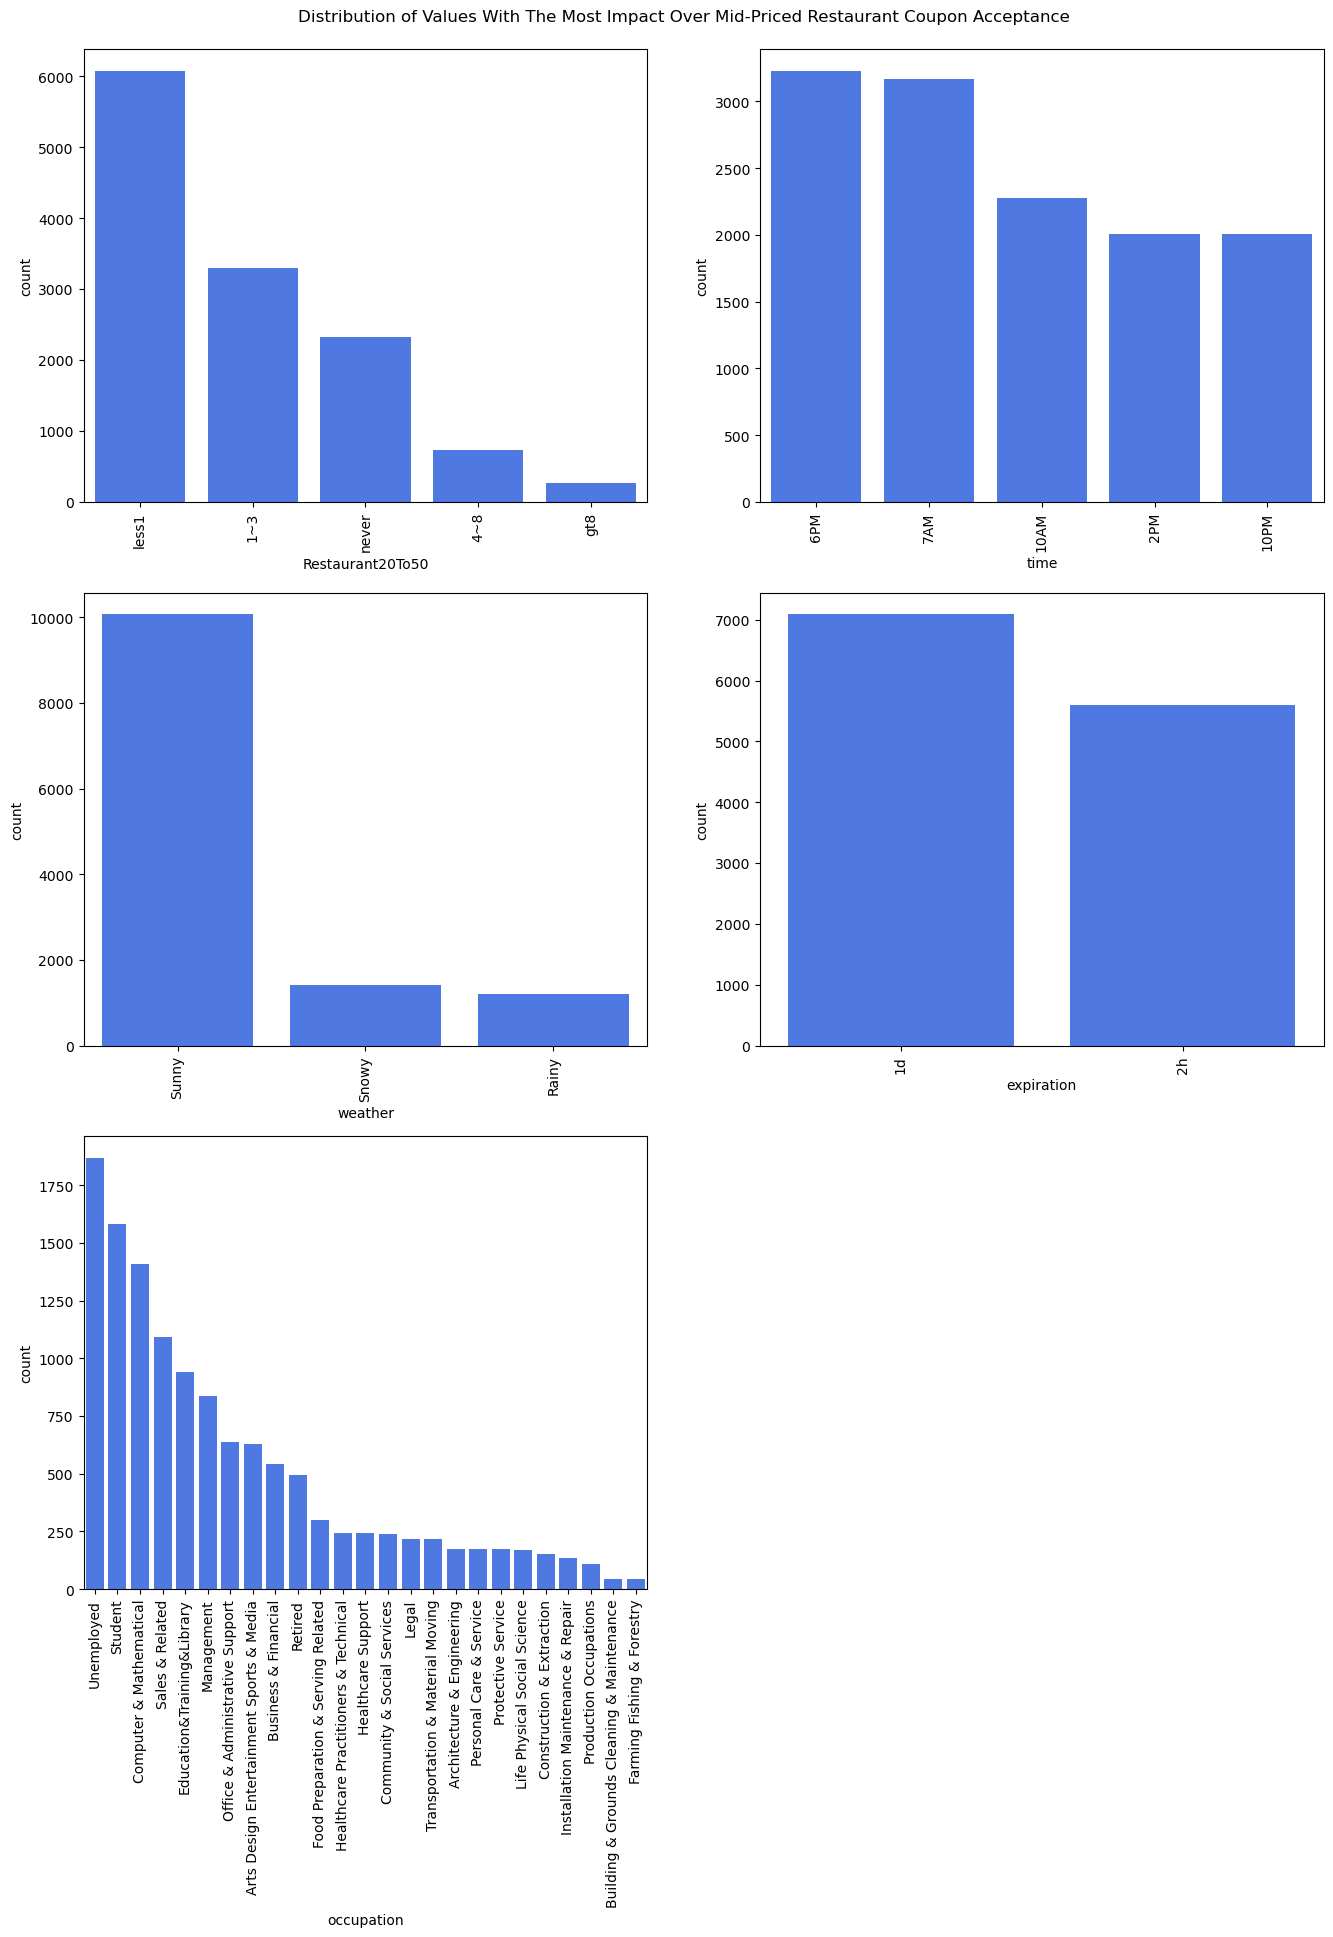

In [478]:
# Let's look at the distribution of each of these filter criteria.
filter_cols = ['Restaurant20To50', 'time', 'weather', 'expiration', 'occupation']

# Create subplots
num_xplots = 2
num_yplots = 3
fig, axes = plt.subplots(num_yplots, num_xplots, figsize=(16, 20))

x = 0
y = 0
for col in filter_cols:
    # Plot the count of each unique value in the coupon column.
    sns.barplot(cdata[col].value_counts(), ax=axes[y,x])
    axes[y,x].tick_params(axis='x', rotation=90)

    # Increment the plot location
    x += 1
    if x >= num_xplots:
        x = 0
        y += 1

axes[2, 1].axis('off')
fig.suptitle('Distribution of Values With The Most Impact Over Mid-Priced Restaurant Coupon Acceptance', y=.9)
print()

The figures above show that there is a good number, e.g. greater than 1000 instances, of each value that has an impact over the mid-priced restaurant coupon acceptance.